In [15]:
#pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [18]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
dataset['Geography'].fillna(dataset['Geography'].mode()[0],inplace = True)
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [33]:

dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [34]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [35]:
dataset['Geography'] = le.fit_transform(dataset['Gender'])

In [36]:
dataset['Surname'] = le.fit_transform(dataset['Surname'])

In [37]:

x = dataset.iloc[:,3:13].values 
y = dataset.iloc[:,13:14].values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
													test_size = 0.2, 
													random_state = 0)


In [43]:
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)


<AxesSubplot:>

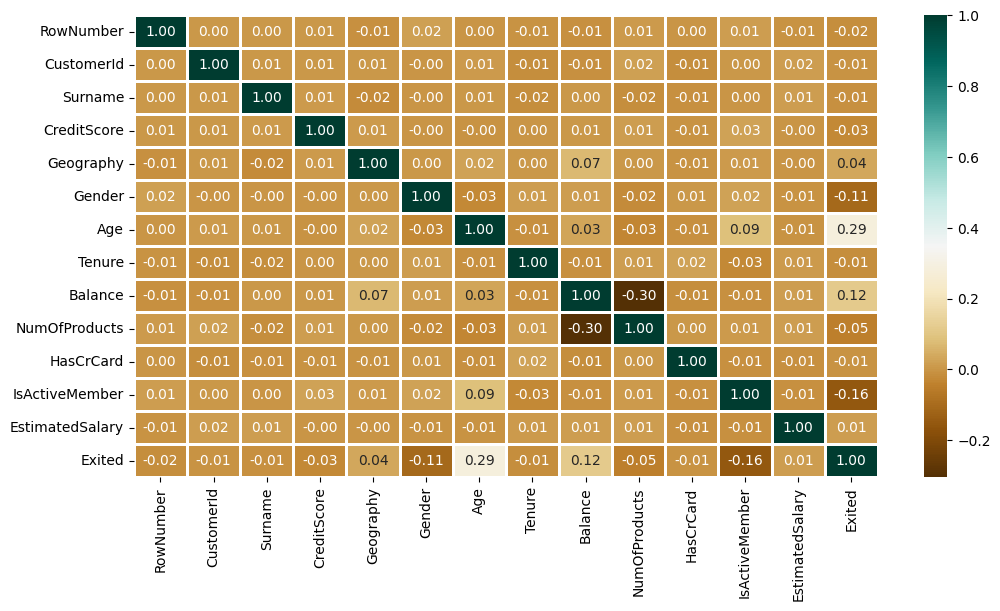

In [44]:
plt.figure(figsize=(12,6)) 

sns.heatmap(dataset.corr(), 
			cmap='BrBG', 
			fmt='.2f', 
			linewidths=2, 
			annot=True)


/var/folders/gd/y47_lpw128b2cwd5w58114lh0000gn/T/ipykernel_14894/3649183223.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
/var/folders/gd/y47_lpw128b2cwd5w58114lh0000gn/T/ipykernel_14894/3649183223.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
/var/folders/gd/

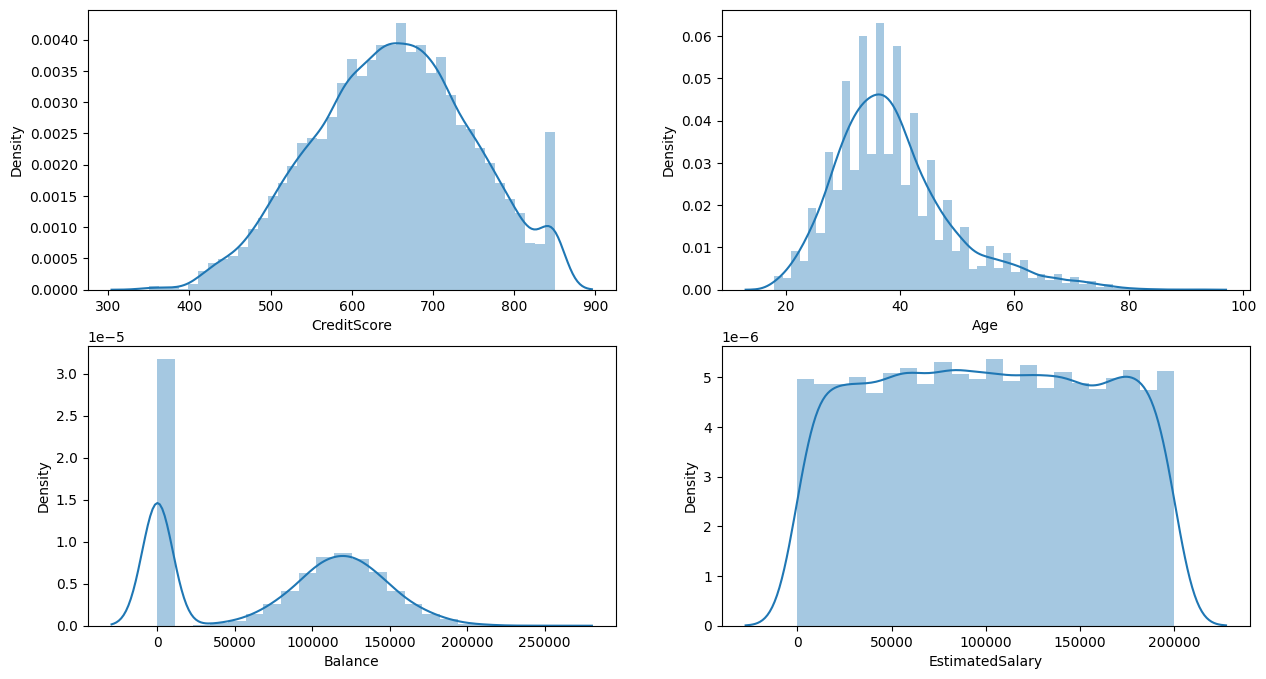

In [45]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
plt.subplots(figsize=(15, 8)) 
index = 1

for i in lis: 
	plt.subplot(2, 2, index) 
	sns.distplot(dataset[i]) 
	index += 1


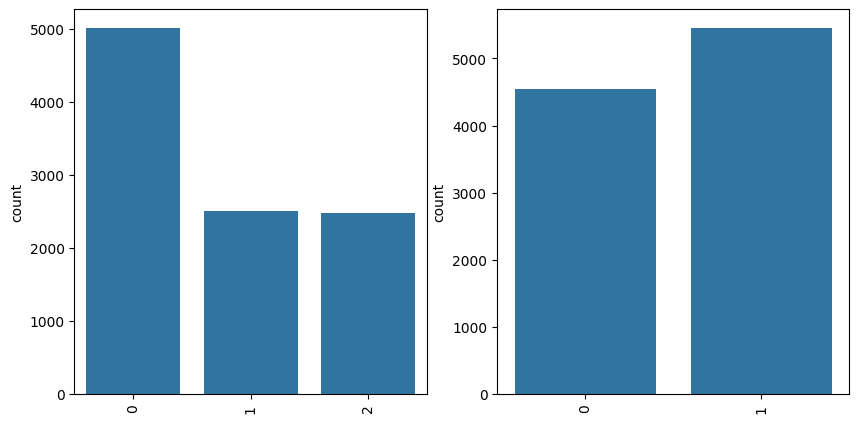

In [47]:
lis2 = ['Geography', 'Gender'] 
plt.subplots(figsize=(10, 5)) 
index = 1

for col in lis2: 
	y = dataset[col].value_counts() 
	plt.subplot(1, 2, index) 
	plt.xticks(rotation=90) 
	sns.barplot(x=list(y.index), y=y) 
	index += 1
